In [4]:
import ast
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import ast

def text_to_dict(file_path):
    dictionary = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    for line in lines:
        if line.strip():  # Skip empty lines
            key, values = line.split(':', 1)  # Split only on the first colon
            key = key.strip()
            values = values.strip()
            
            # Evaluate the string representation of the list or handle single integers
            try:
                if values.startswith('[') and values.endswith(']'):
                    value_list = ast.literal_eval(values)
                    if isinstance(value_list, list):
                        dictionary[key] = value_list
                    else:
                        raise ValueError("Parsed value is not a list")
                else:
                    dictionary[key] = int(values)
            except ValueError:
                pass
            except Exception as e:
                pass
    
    return dictionary


In [14]:
train_dict_r1 = 'run_result_storage/FINAL_A1/training_metrics.txt'
train_dict_r2 = 'run_result_storage/FINAL_A2/training_metrics.txt'
eval_dict_r1 = 'run_result_storage/FINAL_A1/evaluation_metrics.txt'
eval_dict_r2 = 'run_result_storage/FINAL_A2/evaluation_metrics.txt'

In [12]:
def plot_grid_comparison_train(dict1_path, dict2_path, labels):
    metrics_1 = text_to_dict(dict1_path)
    metrics_2 = text_to_dict(dict2_path)
    plt.plot(metrics_1["Total reward"], label = labels[0])
    plt.plot(metrics_2["Total reward"], label = labels[1])
    plt.legend()
    plt.show()

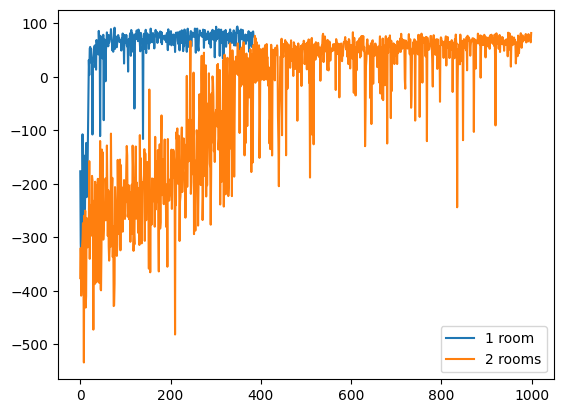

In [13]:
plot_grid_comparison_train(train_dict_r1, train_dict_r2, ["1 room", "2 rooms"])

In [69]:
def plot_grid_comparison_eval(dict1, dict2, labels):
    metrics_1 = text_to_dict(dict1)
    metrics_2 = text_to_dict(dict2)
    
    for key, value in metrics_1.items():
        if key not in ["Epsilon", "Early stopping episode", "Loss"]:
            print(key, np.mean(value))
    print('\n')
    for key, value in metrics_2.items():
        if key not in ["Epsilon", "Early stopping episode", "Loss"]:
            print(key, np.mean(value))

In [68]:
plot_grid_comparison_eval(eval_dict_r1, eval_dict_r2, ["room1", "room2"])


Steps taken 126.29
Kitchen visits 2.58
Wrong table visits 0.0
Plates delivered (%) 86.0
Total reward 68.05599999999991


Steps taken 454.43
Kitchen visits 1.19
Wrong table visits 17.23
Plates delivered (%) 32.11111111111111
Total reward -116.89700000000026


/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_21150/3563674565.py:12: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  plt.bar([1,2] [metrics_1["Steps taken"], metrics_2["Steps taken"]])
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_21150/3563674565.py:12: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  plt.bar([1,2] [metrics_1["Steps taken"], metrics_2["Steps taken"]])
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_21150/3563674565.py:12: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  plt.bar([1,2] [metrics_1["Steps taken"], metrics_2["Steps taken"]])
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_21150/3563674565.py:12: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  plt.bar([1,2] [metrics_1["Steps taken"], metrics_2["Steps taken"]])


TypeError: list indices must be integers or slices, not tuple

In [49]:
evaluation_metrics = text_to_dict("run_result_storage/train_a2r_with_eval_eps/evaluation_metrics.txt")
for key, value in evaluation_metrics.items():
    if key not in ["Epsilon", "Early stopping episode", "Loss"]:
        print(key, np.mean(value))

Steps taken 242.86
Kitchen visits 2.8
Wrong table visits 16.41
Plates delivered (%) 87.66666666666666
Total reward -32.99199999999982


In [78]:
def positional_encoding(visit_list, num_tables, d_model=16):
    if not visit_list:  # If visit list is empty, return a zero vector
        return np.zeros(num_tables * d_model)
    
    def get_angles(pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

    angle_rads = get_angles(np.arange(num_tables)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # apply sin to even indices in the array
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # apply cos to odd indices in the array

    positional_encodings = np.zeros((num_tables, d_model))
    for table in visit_list:
        positional_encodings[table] = angle_rads[table]

    return positional_encodings.flatten()

def one_hot_encode_position(position, grid_size):
    one_hot = np.zeros(grid_size * grid_size)
    one_hot[position[0] * grid_size + position[1]] = 1
    return one_hot

# Example usage
num_tables = 6
visit_list = [3,4,4,5,5]
visit_encoding = positional_encoding(visit_list, num_tables)
print("Positional Encoded Visit List:", visit_encoding)

Positional Encoded Visit List: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.41120008e-01 -9.89992497e-01  8.12648897e-01  5.82753611e-01
  2.95520207e-01  9.55336489e-01  9.47260913e-02  9.95503374e-01
  2.99955002e-02  9.99550034e-01  9.48669068e-03  9.9995500